In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data set
df = pd.read_csv("train.csv")
df.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


### Basic EDA and statistical analysis

In [3]:
df.shape

(1039, 14)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

In [5]:
# Checking for null values in the data set
df.isnull().sum()

Number words female                     0
Total words                             0
Number of words lead                    0
Difference in words lead and co-lead    0
Number of male actors                   0
Year                                    0
Number of female actors                 0
Number words male                       0
Gross                                   0
Mean Age Male                           0
Mean Age Female                         0
Age Lead                                0
Age Co-Lead                             0
Lead                                    0
dtype: int64

1    785
0    254
Name: Lead, dtype: int64


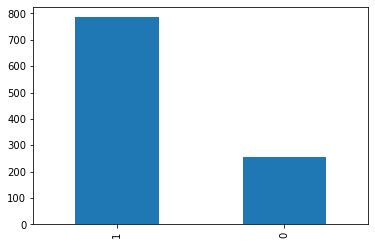

In [6]:
# Checking the number of male and female leads in the given data set
df["Lead"].replace(["Male","Female"],[1,0],inplace=True)
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = df["Lead"].map(lambda x: color_wheel.get(x + 1))
print(df.Lead.value_counts())
p=df.Lead.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcome value as 1(male). It means that most of the Lead characters are male. The number of male lead is more than twice the number of Female Lead.

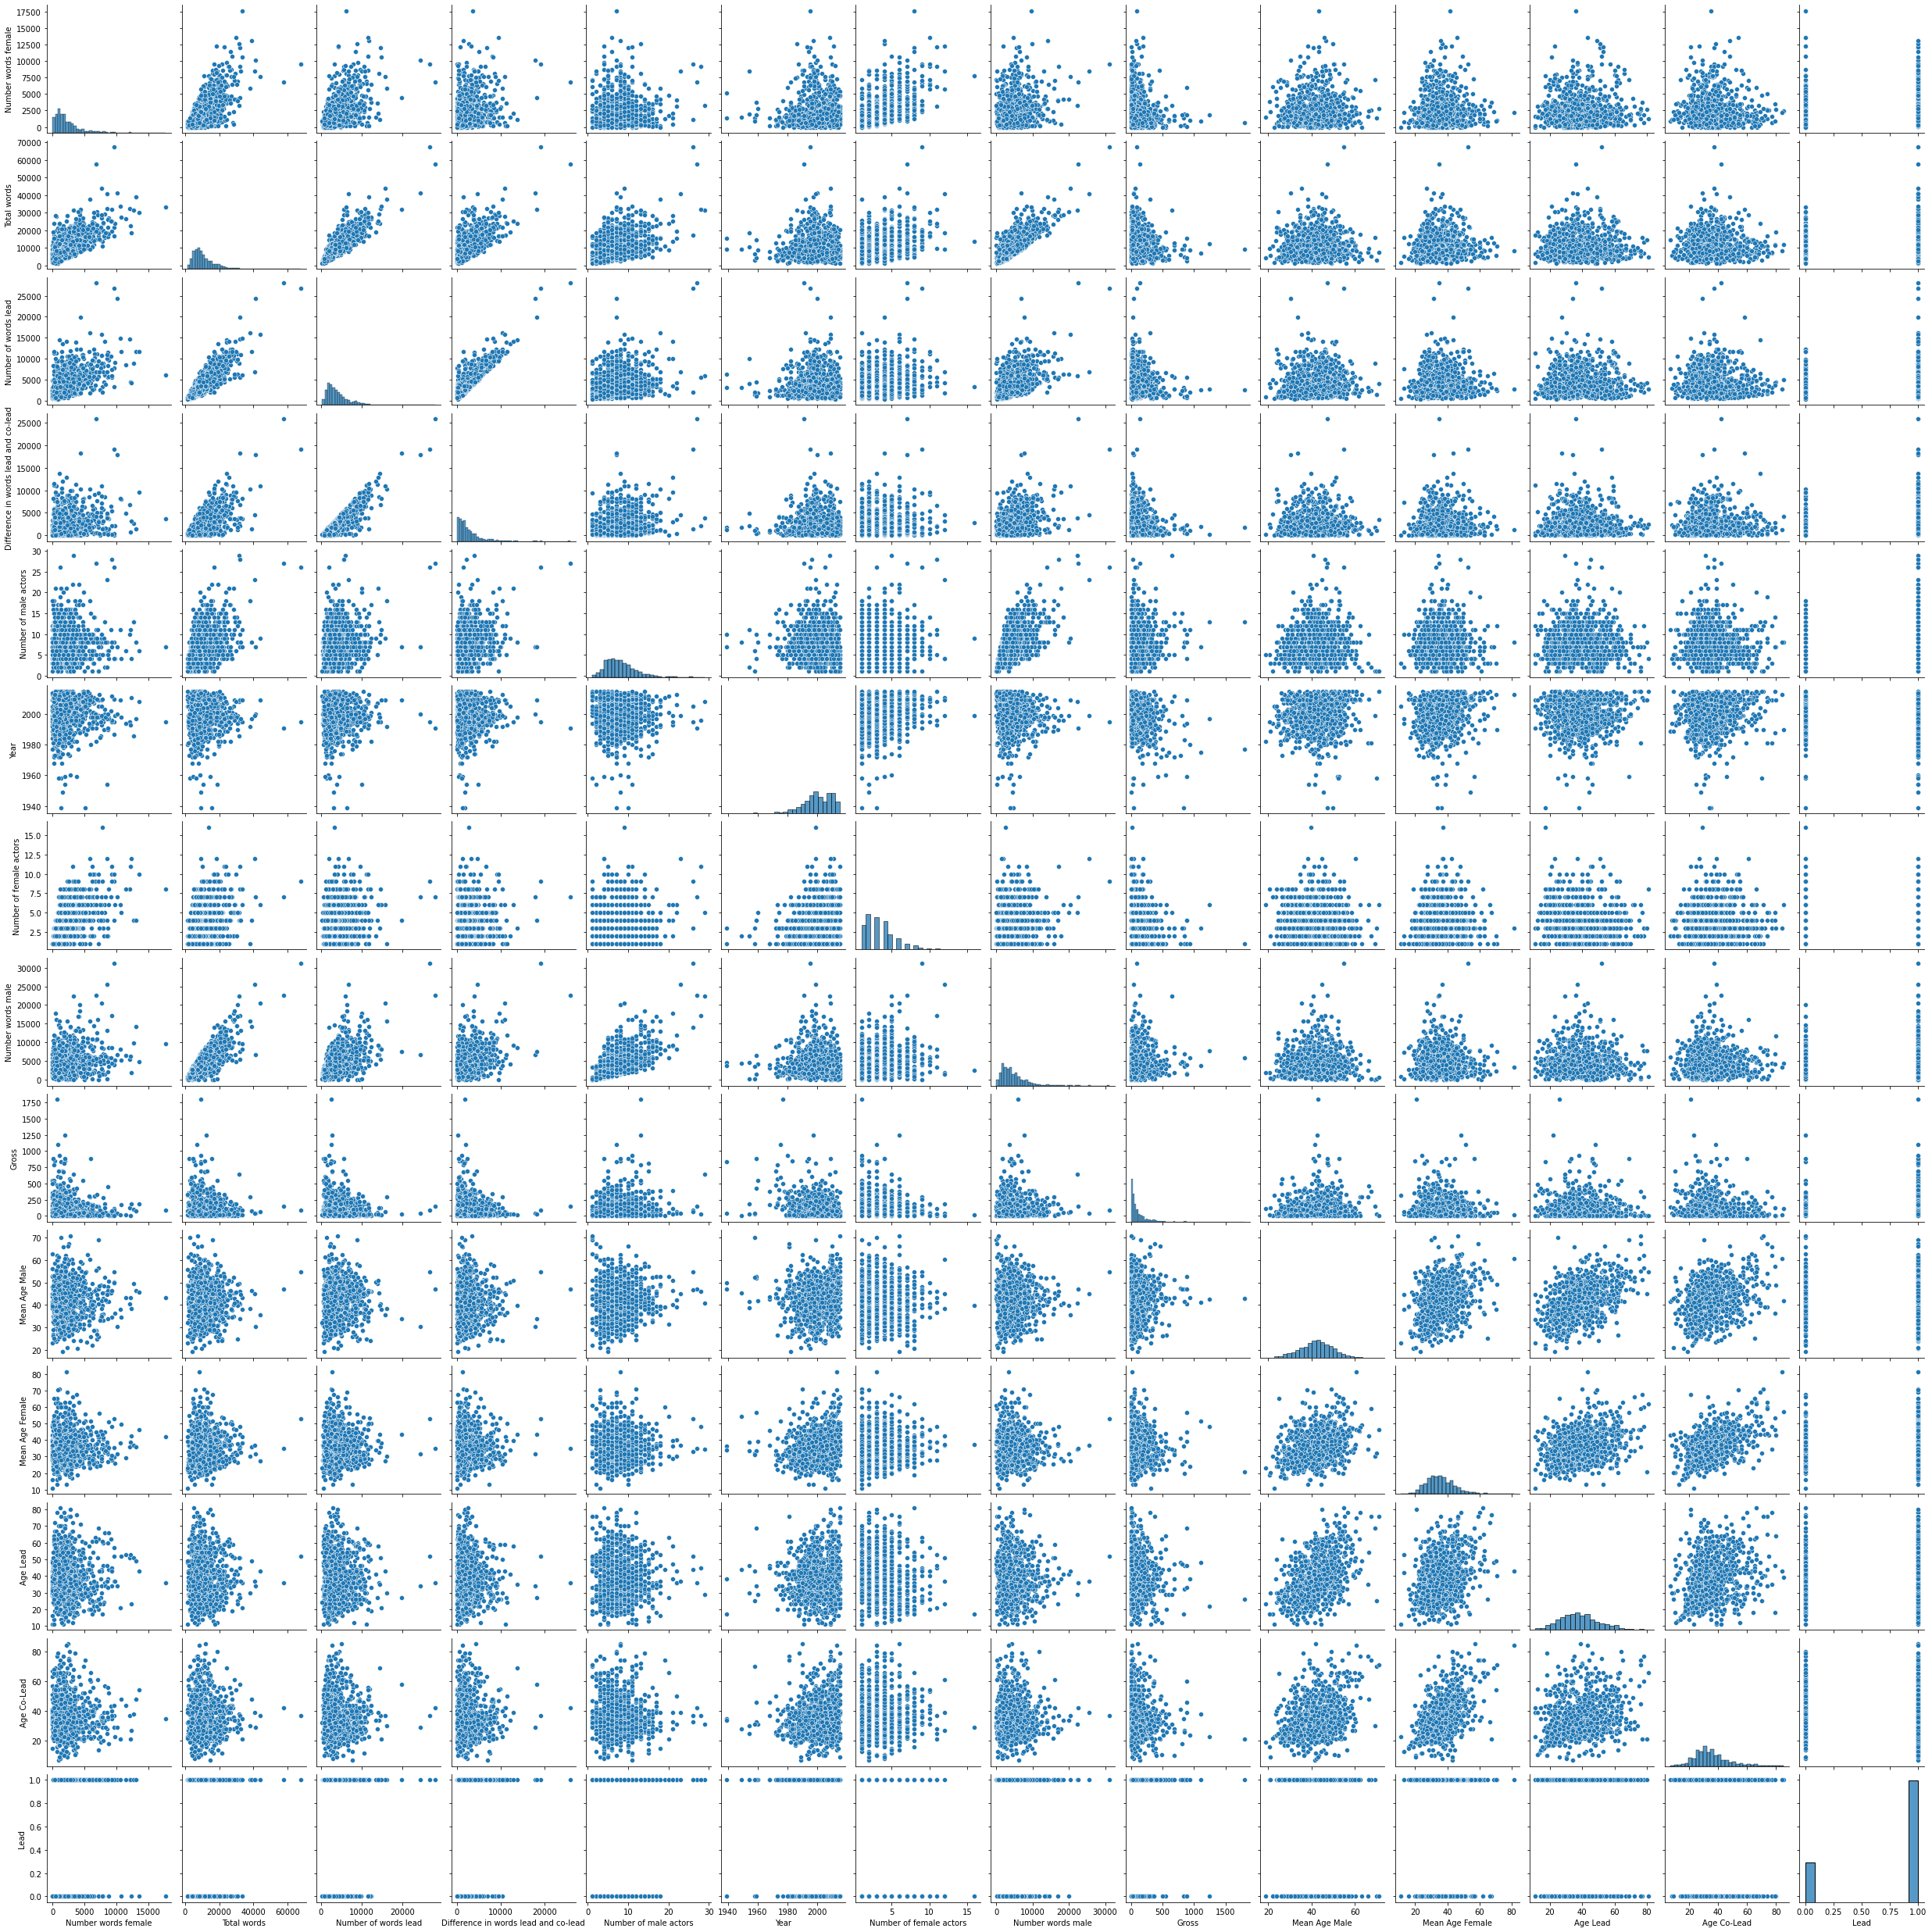

In [7]:
#Scatter matrix of uncleaned data
sns.pairplot(df)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number words female,1039.0,2334.256015,2157.216744,0.0,904.000000,1711.0,3030.500000,17658.000000
Total words,1039.0,11004.368624,6817.397413,1351.0,6353.500000,9147.0,13966.500000,67548.000000
Number of words lead,1039.0,4108.256978,2981.251156,318.0,2077.000000,3297.0,5227.000000,28102.000000
Difference in words lead and co-lead,1039.0,2525.024062,2498.747279,1.0,814.500000,1834.0,3364.000000,25822.000000
Number of male actors,1039.0,7.767084,3.901439,1.0,5.000000,7.0,10.000000,29.000000
Year,1039.0,1999.862368,10.406632,1939.0,1994.000000,2000.0,2009.000000,2015.000000
Number of female actors,1039.0,3.507218,2.088526,1.0,2.000000,3.0,5.000000,16.000000
Number words male,1039.0,4561.855630,3417.855987,0.0,2139.500000,3824.0,5887.500000,31146.000000
Gross,1039.0,111.149182,151.761551,0.0,22.000000,60.0,143.500000,1798.000000
Mean Age Male,1039.0,42.353766,7.817110,19.0,37.480769,42.6,47.333333,71.000000


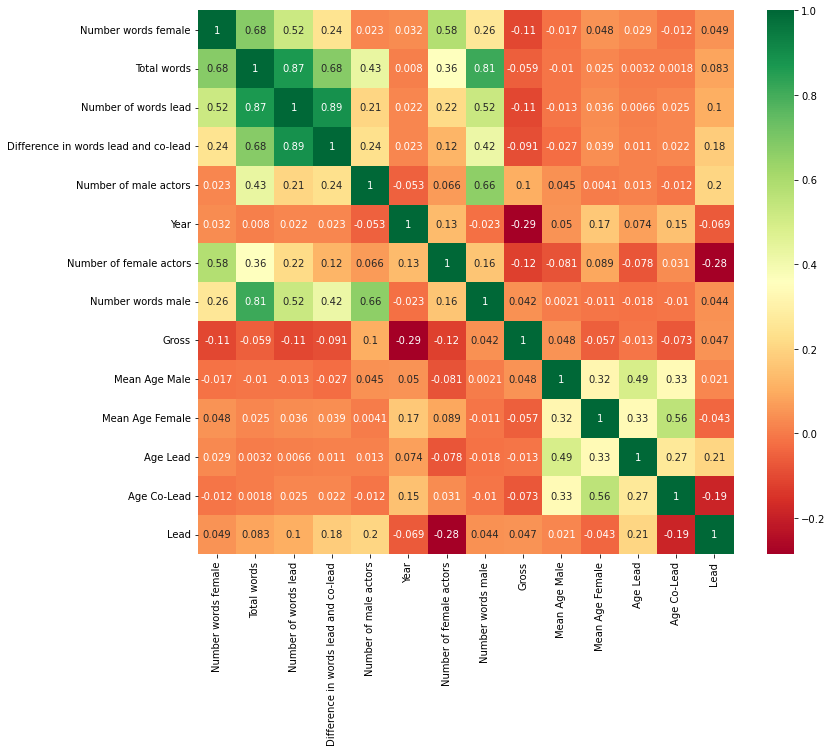

In [9]:
#Pearson's Correlation Coefficient
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

### Feature Selection

In [10]:
X = df[['Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of male actors', 'Year',
       'Number of female actors', 'Number words male', 'Gross',
       'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead']]

In [11]:
y = df.Lead

In [12]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (727, 13) (727,)
Testing set shape:  (312, 13) (312,)


In [13]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [14]:
# Get the five best(k = 5) features using the SelectKBest method
ft = SelectKBest(chi2, k = 5).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [4.47407195e+03 2.64569695e+04 1.64627565e+04 4.69396068e+04
 5.33708618e+01 1.72531050e-01 5.92524733e+01 6.91577656e+03
 9.03284754e+02 1.29621293e+00 8.62920336e-01 1.20261199e+02
 8.26207983e+01]
Columns:  Index(['Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of male actors', 'Year',
       'Number of female actors', 'Number words male', 'Gross',
       'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'],
      dtype='object')


In [15]:
ft = SelectKBest(f_classif, k= 5).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [ 2.13789157  6.29403812  7.77465901 20.20412246 28.27390892  3.25058497
 50.25645109  2.77397168  4.4626345   0.91798616  0.36985928 32.70102687
 21.00901245]
Columns:  Index(['Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of male actors', 'Year',
       'Number of female actors', 'Number words male', 'Gross',
       'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'],
      dtype='object')


In [16]:
X_train_2 = ft.transform(X_train)
X_test_2 = ft.transform(X_test)

In [17]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train_2).transform(X_train_2.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test_2).transform(X_test_2.astype(float))

### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [19]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
mean_acc

array([0.74358974, 0.72115385, 0.76282051, 0.79166667, 0.78205128,
       0.81089744, 0.81730769, 0.81730769, 0.82692308, 0.82051282,
       0.80769231, 0.82051282, 0.79807692, 0.81089744, 0.80128205,
       0.81410256, 0.79166667, 0.79807692, 0.80128205, 0.80128205])

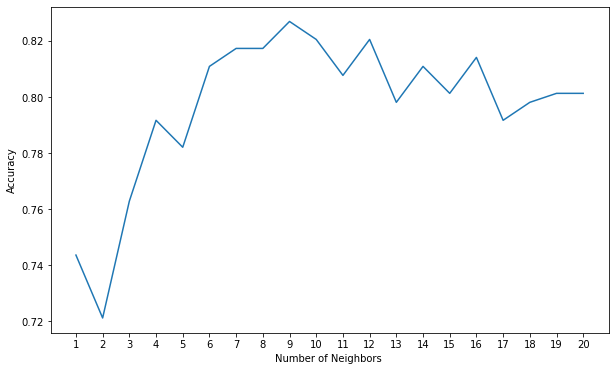

In [20]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

### Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid_params = { 'n_neighbors' : np.arange(1,50,1, dtype=int),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [23]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [24]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


In [25]:
g_res.best_score_

0.7937171943905951

In [26]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'uniform'}

In [27]:
knn = KNeighborsClassifier(n_neighbors = 19, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=19)

In [28]:
# prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

### Model Evaluation

In [29]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.8005502063273727
Test set accuracy:  0.8012820512820513


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.83      0.30      0.45        82
           1       0.80      0.98      0.88       230

    accuracy                           0.80       312
   macro avg       0.82      0.64      0.66       312
weighted avg       0.81      0.80      0.77       312



Text(0.5, 15.0, 'Predicted label')

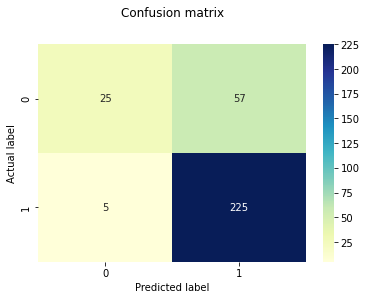

In [31]:
cnf_matrix = metrics.confusion_matrix(y_test, y_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
#naive classifier
Male_list = list(y_test)
sum = 0
for i in range(len(Male_list)):
    if Male_list[i] == 1:
        sum += 1
print('Accuracy:')
print(sum/len(Male_list))

Accuracy:
0.7371794871794872


### Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =5)

In [34]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.7690124489037532
